In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [17]:
dfRS = pd.read_csv("clean_data/PLL_RegSeason_Clean.csv")

dfPS = pd.read_csv("clean_data/PLL_PostSeason_Clean.csv")


In [18]:
dfRS.head()

,full_name,team_code,number,position,games_played,points,goals,assists,1_point_attempts,1_point_percent,...,faceoff_attempts,faceoff_win_percent,first_name,last_name,1_point_goals,1_point_shots,2_point_goals,2_point_shots,faceoff_wins,faceoffs_taken
0,Adam Ghitelman,ARC,8,Goalie,9,0,0,0,0-0,0.0%,...,0-0,0.0%,Adam,Ghitelman,0,0,0,2,0,0
1,Austin Sims,ARC,18,Midfield,3,2,2,0,2-10,20.0%,...,0-0,0.0%,Austin,Sims,2,10,0,2,0,0
2,Ben McIntosh,ARC,90,Midfield,10,13,11,2,11-43,25.5%,...,0-0,0.0%,Ben,McIntosh,11,43,0,1,0,0
3,Christian Cuccinello,ARC,30,Attack,8,12,8,4,8-27,29.6%,...,0-0,0.0%,Christian,Cuccinello,8,27,0,1,0,0
4,Danny Eipp,ARC,3,Midfield,9,9,5,4,5-19,26.3%,...,0-0,0.0%,Danny,Eipp,5,19,0,0,0,0


In [19]:
#['ARCHERS', 'ATLAS', 'CHAOS', 'CHROME', 'REDWOODS', 'WHIPSNAKES']

## Check shape

In [20]:
dfRS.shape

(184, 28)

In [21]:
dfPS.shape

(186, 28)

In [22]:
name_set_rs=[]
name_set_ps=[]
for i in dfRS.get_values():
    name_set_rs.append(i[0])
for i in dfPS.get_values():
    name_set_ps.append(i[0])
# name_set_rs.difference(name_set_ps)

def diff(first, second):
        second = set(second)
        return [item for item in first if item not in second]
diff(name_set_ps, name_set_rs)

['Brent Noseworthy', 'Austin Henningsen']

In [23]:
dfPS[dfPS.full_name == "Brent Noseworthy"]

,full_name,team_code,number,position,games_played,points,goals,assists,1_point_attempts,1_point_percent,...,faceoff_attempts,faceoff_win_percent,first_name,last_name,1_point_goals,1_point_shots,2_point_goals,2_point_shots,faceoff_wins,faceoffs_taken
58,Brent Noseworthy,ATL,19,A,1,1,1,0,1-2,50.0%,...,0-0,0.0%,Brent,Noseworthy,1,2,0,0,0,0


In [24]:
dfPS[dfPS.full_name == "Austin Henningsen"]

,full_name,team_code,number,position,games_played,points,goals,assists,1_point_attempts,1_point_percent,...,faceoff_attempts,faceoff_win_percent,first_name,last_name,1_point_goals,1_point_shots,2_point_goals,2_point_shots,faceoff_wins,faceoffs_taken
92,Austin Henningsen,CHA,8,FO,1,0,0,0,0-0,0.0%,...,1-2,50.0%,Austin,Henningsen,0,0,0,0,1,2


In [25]:
# dfRS[dfRS.team_code == 'ATL']
# dfPS[dfPS.team_code == 'ATL']
# ATL = pd.concat([dfPS[dfPS.team_code == 'ATL'], dfRS[dfRS.team_code == 'ATL']]).loc[dfPS[dfPS.team_code == 'ATL'].index.difference(dfRS[dfRS.team_code == 'ATL'].index)]
# ATL
# new = dfRS[dfRS.team_code == 'ATL']
# ATL_RS  = new.append(ATL)
# ATL_RS

# CHA = pd.concat([dfPS[dfPS.team_code == 'CHA'], dfRS[dfRS.team_code == 'CHA']]).loc[dfPS[dfPS.team_code == 'CHA'].index.difference(dfRS[dfRS.team_code == 'CHA'].index)]
# CHA.iloc[2]
# CHA_RS = dfRS[dfRS.team_code == 'CHA']
# CHA_RS = CHA_RS.append(CHA.iloc[2])
# CHA_RS

In [26]:
dfPS.shape

(186, 28)

In [27]:
pivRS = pd.pivot_table(dfRS, index="team_code", aggfunc="count")
pivRS

,1_point_attempts,1_point_goals,1_point_percent,1_point_shots,2_point_attempts,2_point_goals,2_point_percent,2_point_shots,assists,caused_turnovers,...,goals,groundballs,last_name,number,points,position,shooting_percent,shots_on_goal,total_shots,turnovers
team_code,,,,,,,,,,,,,,,,,,,,,
ARC,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
ATL,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
CHA,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
CHR,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
RED,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
WHP,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [28]:
pd.pivot_table(dfPS, index="team_code", aggfunc="count")

,1_point_attempts,1_point_goals,1_point_percent,1_point_shots,2_point_attempts,2_point_goals,2_point_percent,2_point_shots,assists,caused_turnovers,...,goals,groundballs,last_name,number,points,position,shooting_percent,shots_on_goal,total_shots,turnovers
team_code,,,,,,,,,,,,,,,,,,,,,
ARC,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
ATL,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
CHA,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
CHR,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
RED,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
WHP,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


# TO BE CORRECTED 
the below needs to fixed with respect to the different shape in the tables

In [29]:
dfRS.columns

Index(['full_name', 'team_code', 'number', 'position', 'games_played',
       'points', 'goals', 'assists', '1_point_attempts', '1_point_percent',
       '2_point_attempts', '2_point_percent', 'total_shots',
       'shooting_percent', 'shots_on_goal', 'turnovers', 'caused_turnovers',
       'groundballs', 'faceoff_attempts', 'faceoff_win_percent', 'first_name',
       'last_name', '1_point_goals', '1_point_shots', '2_point_goals',
       '2_point_shots', 'faceoff_wins', 'faceoffs_taken'],
      dtype='object')

In [30]:
dfPS.columns

Index(['full_name', 'team_code', 'number', 'position', 'games_played',
       'points', 'goals', 'assists', '1_point_attempts', '1_point_percent',
       '2_point_attempts', '2_point_percent', 'total_shots',
       'shooting_percent', 'shots_on_goal', 'turnovers', 'caused_turnovers',
       'groundballs', 'faceoff_attempts', 'faceoff_win_percent', 'first_name',
       'last_name', '1_point_goals', '1_point_shots', '2_point_goals',
       '2_point_shots', 'faceoff_wins', 'faceoffs_taken'],
      dtype='object')

In [31]:
#@title derive season total for offensive stats
dfST = pd.concat([dfRS[['team_code','first_name','last_name','position','games_played',
       'points', 'goals', 'assists','1_point_goals','2_point_goals']], dfPS[['games_played',
       'points', 'goals', 'assists','1_point_goals','2_point_goals']]], axis=1)
dfST

,team_code,first_name,last_name,position,games_played,points,goals,assists,1_point_goals,2_point_goals,games_played,points,goals,assists,1_point_goals,2_point_goals
0,ARC,Adam,Ghitelman,Goalie,9.0,0.0,0.0,0.0,0.0,0.0,3,1,0,1,0,0
1,ARC,Austin,Sims,Midfield,3.0,2.0,2.0,0.0,2.0,0.0,1,0,0,0,0,0
2,ARC,Ben,McIntosh,Midfield,10.0,13.0,11.0,2.0,11.0,0.0,2,3,1,2,1,0
3,ARC,Christian,Cuccinello,Attack,8.0,12.0,8.0,4.0,8.0,0.0,3,5,4,1,4,0
4,ARC,Danny,Eipp,Midfield,9.0,9.0,5.0,4.0,5.0,0.0,3,6,3,3,3,0
5,ARC,Davey,Emala,Attack,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,1,0
6,ARC,Dominique,Alexander,Midfield,10.0,1.0,0.0,1.0,0.0,0.0,3,1,1,0,1,0
7,ARC,Drew,Adams,Goalie,7.0,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,0
8,ARC,Evan,Connell,Defense,3.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0,0,0
9,ARC,Goran,Murray,Defense,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


### Summing duplicates and removing them to give combined DF

In [32]:
dfST = dfST.groupby(lambda x:x, axis=1).sum()

### Reordering columns

In [33]:
cols=['team_code','first_name','last_name','position','games_played',
       'points', 'goals', 'assists','1_point_goals','2_point_goals']
dfST = dfST[cols]

In [34]:
#dfST = dfST.drop(index=[184,185])

In [39]:
dfST

,team_code,first_name,last_name,position,games_played,points,goals,assists,1_point_goals,2_point_goals
0,ARC,Adam,Ghitelman,Goalie,12.0,1.0,0.0,1.0,0.0,0.0
1,ARC,Austin,Sims,Midfield,4.0,2.0,2.0,0.0,2.0,0.0
2,ARC,Ben,McIntosh,Midfield,12.0,16.0,12.0,4.0,12.0,0.0
3,ARC,Christian,Cuccinello,Attack,11.0,17.0,12.0,5.0,12.0,0.0
4,ARC,Danny,Eipp,Midfield,12.0,15.0,8.0,7.0,8.0,0.0
5,ARC,Davey,Emala,Attack,2.0,1.0,1.0,0.0,1.0,0.0
6,ARC,Dominique,Alexander,Midfield,13.0,2.0,1.0,1.0,1.0,0.0
7,ARC,Drew,Adams,Goalie,10.0,0.0,0.0,0.0,0.0,0.0
8,ARC,Evan,Connell,Defense,5.0,0.0,0.0,0.0,0.0,0.0
9,ARC,Goran,Murray,Defense,3.0,0.0,0.0,0.0,0.0,0.0


In [40]:
dfSumm = pd.pivot_table(dfST, index="team_code", values=["1_point_goals","2_point_goals","assists","goals","points"], aggfunc="sum")
dfSumm

,1_point_goals,2_point_goals,assists,goals,points
team_code,,,,,
0,0.0,0.0,0.0,0.0,0.0
ARC,145.0,8.0,99.0,153.0,260.0
ATL,126.0,11.0,85.0,137.0,233.0
CHA,121.0,12.0,76.0,133.0,221.0
CHR,128.0,8.0,67.0,136.0,211.0
RED,139.0,6.0,80.0,145.0,231.0
WHP,127.0,15.0,80.0,142.0,237.0


In [41]:
dfSumm["score"] = dfSumm["points"]-dfSumm["assists"]
dfSumm

,1_point_goals,2_point_goals,assists,goals,points,score
team_code,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0
ARC,145.0,8.0,99.0,153.0,260.0,161.0
ATL,126.0,11.0,85.0,137.0,233.0,148.0
CHA,121.0,12.0,76.0,133.0,221.0,145.0
CHR,128.0,8.0,67.0,136.0,211.0,144.0
RED,139.0,6.0,80.0,145.0,231.0,151.0
WHP,127.0,15.0,80.0,142.0,237.0,157.0


In [42]:
dfSumm["score"] = dfSumm["1_point_goals"]+(2*dfSumm["2_point_goals"])
dfSumm

,1_point_goals,2_point_goals,assists,goals,points,score
team_code,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0
ARC,145.0,8.0,99.0,153.0,260.0,161.0
ATL,126.0,11.0,85.0,137.0,233.0,148.0
CHA,121.0,12.0,76.0,133.0,221.0,145.0
CHR,128.0,8.0,67.0,136.0,211.0,144.0
RED,139.0,6.0,80.0,145.0,231.0,151.0
WHP,127.0,15.0,80.0,142.0,237.0,157.0


# Stat leaders exploration

In [43]:
dfST.sort_values(by="points", ascending=False).head(10)

,team_code,first_name,last_name,position,games_played,points,goals,assists,1_point_goals,2_point_goals
24,ARC,Will,Manny,Attack,13.0,50.0,35.0,14.0,34.0,1.0
13,ARC,Marcus,Holman,Attack,13.0,43.0,33.0,8.0,31.0,2.0
151,RED,Jules,Heningburg,Attack,13.0,43.0,27.0,16.0,27.0,0.0
172,WHP,Matt,Rambo,Attack,10.0,42.0,19.0,23.0,19.0,0.0
22,ARC,Tom,Schreiber,Midfield,11.0,39.0,17.0,20.0,15.0,2.0
104,CHR,Justin,Guterding,Attack,10.0,35.0,20.0,14.0,19.0,1.0
35,ATL,Eric,Law,Attack,12.0,34.0,23.0,11.0,23.0,0.0
64,CHA,Connor,Fields,Attack,12.0,33.0,22.0,11.0,22.0,0.0
102,CHR,Jordan,Wolf,Attack,10.0,32.0,16.0,16.0,16.0,0.0
34,ATL,Connor,Buczek,Midfield,11.0,31.0,22.0,4.0,17.0,5.0


In [48]:
PointsTopTen = dfST.sort_values(by="points", ascending=False).head(10)

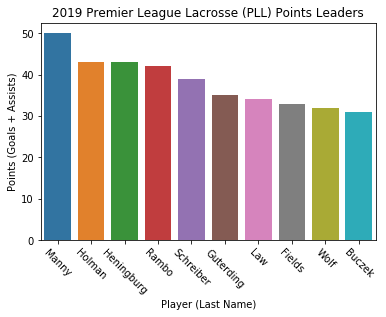

In [62]:
chart = sns.barplot(x=PointsTopTen.last_name, y=PointsTopTen.points)
chart.set_xticklabels(chart.get_xticklabels(),rotation=-45)
plt.xlabel("Player (Last Name)")
plt.ylabel("Points (Goals + Assists)")
plt.title("2019 Premier League Lacrosse (PLL) Points Leaders")
plt.savefig("img/PointsTopTen.svg", dpi=300, pad_inches=0, bbox_inches = 'tight')
plt.show()